<h2>AI/ML Course - Week 3</h2>

<p>Mariano Salcedo - mariano.salcedo@nokia.com</p>

In [1]:
import glob
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing

%matplotlib inline

## Exercice 01 - Bias vs Variance

### Bias
The <b>bias</b> is an error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs. In other words, model with high bias pays very little attention to the training data and oversimplifies the model.

### Variance
The <b>variance</b> is an error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs. In other words, model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before.


### Bias and Variance in k-Nearest Neighbors
And how Bias and Variance affects KNN? Considering that the KNN algorithm looks through the training data and finds the k training examples that are closest to the new example, if we chose a K=1 then the training data will be perfectly predicted and therefore the Bias will be 0. However, when it comes to new data (in test set), it has higher chance to be an error, which causes high variance. When we increase K, the training error will increase (increase bias), but the test error may decrease at the same time (decrease variance)

In [2]:
path =r'C:\python_sqm\data\raw\AI-ML_Nokia'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename, delimiter=","))

# Concatenate all data into one DataFrame
iris = pd.concat(dfs, ignore_index=True)

In [3]:
iris.head(3)

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [4]:
# Let's create a new dataframe without id field, as it does not provide 
# any information for exploratory analysis
iris_df=iris.drop(columns=['id'])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_df['Species'].replace(to_replace=['Iris-setosa','Iris-versicolor', 'Iris-virginica'], value=[1,2,3],inplace=True)
iris_df.groupby(iris_df['Species']).size().reset_index(name='counts')

,Species,counts
0,1,50
1,2,50
2,3,50


In [29]:
X=iris_df.drop(['Species'], axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
y=iris_df['Species']
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: Species, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
import random

seed = 0
random.seed(0)
np.random.seed(0)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=seed)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,31)
k_scores = []
for k_number in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_number)
    scores = cross_val_score(knn,X,y,cv=5,scoring='accuracy')
    k_scores.append(scores.mean())


Text(0, 0.5, 'Cross-Validated Accuracy')

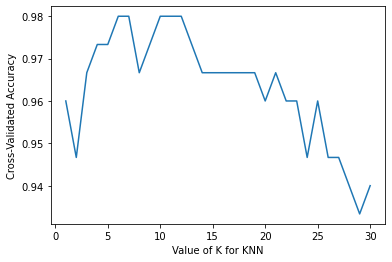

In [10]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

So from this example we see that by using a k value of 6 we get the best Cross-Validated accuracy.</br>
Note that if we 


Let's do the same analysis for the Gamer Ads case

In [11]:
path =r'C:\python_sqm\data\raw\AI-ML_Nokia\gamer_ads'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename, delimiter=","))

# Concatenate all data into one DataFrame
gamer = pd.concat(dfs, ignore_index=True)


In [12]:
gamer.head()

,User ID,ActiveGamer,Age,Score,InterestLevel,GamePurchase
0,15624510,0,19,19,2,0
1,15810944,0,35,20,8,0
2,15668575,1,26,43,5,0
3,15603246,1,27,57,10,0
4,15804002,0,19,76,10,0


In [13]:
gamer=gamer.drop(columns='User ID')

In [14]:
gamer.describe()

,ActiveGamer,Age,Score,InterestLevel,GamePurchase
count,400.000000,400.000000,400.00000,400.000000,400.000000
mean,0.510000,37.655000,69.74250,5.662500,0.357500
std,0.500526,10.482877,34.09696,2.892145,0.479864
min,0.000000,18.000000,15.00000,1.000000,0.000000
25%,0.000000,29.750000,43.00000,3.000000,0.000000
50%,1.000000,37.000000,70.00000,6.000000,0.000000
75%,1.000000,46.000000,88.00000,8.000000,1.000000
max,1.000000,60.000000,150.00000,10.000000,1.000000


So it seems that we have 4 independent variables and one dependent variable (GamePurchase). Let's split the data to prepare it for ML

In [15]:
X=gamer.drop(['GamePurchase'], axis=1)
X.head()

,ActiveGamer,Age,Score,InterestLevel
0,0,19,19,2
1,0,35,20,8
2,1,26,43,5
3,1,27,57,10
4,0,19,76,10


In [16]:
y=gamer['GamePurchase']
y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: GamePurchase, dtype: int64

In [17]:
print(X.shape, y.shape)

(400, 4) (400,)


In [18]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=seed)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (320, 4) (320,)
Test set: (80, 4) (80,)


In [19]:
k_range = range(1,31)
k_scores = []
for k_number in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_number)
    scores = cross_val_score(knn,X,y,cv=5,scoring='accuracy')
    k_scores.append(scores.mean())


Text(0, 0.5, 'Cross-Validated Accuracy')

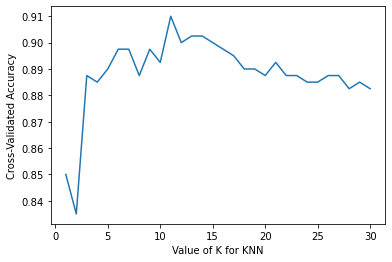

In [20]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

So based on the given setup, with cv=5 we obtain the best Cross Validated Accuracy with a k-value of 11 </br>

Let's try with a cv=10

Text(0, 0.5, 'Cross-Validated Accuracy')

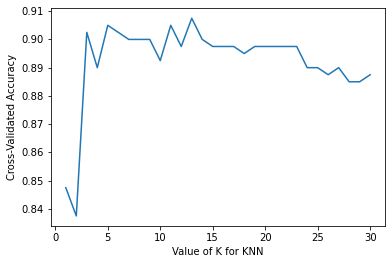

In [21]:
k_range = range(1,31)
k_scores = []
for k_number in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_number)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
    
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### Random Forest
Let's do the same for RandomForestClassifier


In [22]:
from sklearn.ensemble import RandomForestClassifier


Text(0, 0.5, 'Cross-Validated Accuracy')

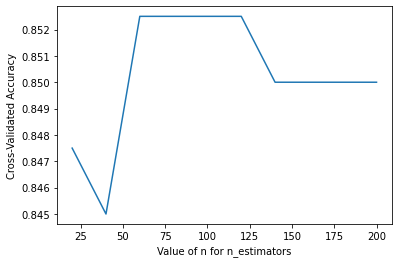

In [23]:
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
n_scores=[]
for n in n_estimators:
    RF = RandomForestClassifier(n_estimators=n,  random_state=seed)
    scores = cross_val_score(RF,X,y)
    n_scores.append(scores.mean())
    
plt.plot(n_estimators,n_scores)
plt.xlabel('Value of n for n_estimators')
plt.ylabel('Cross-Validated Accuracy')

So we see from this iterations that a value of n_estimators = 100 (number of trees in the foreset)

## Finding Important Features¶


Let's now find the most important features for Iris and Game adds datasets

In [24]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)


RandomForestClassifier()

No handles with labels found to put in legend.


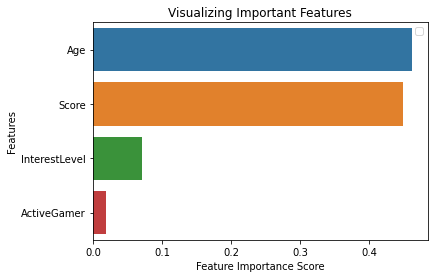

In [25]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()

Let's do the same analysis for Game Adds dataset:

No handles with labels found to put in legend.


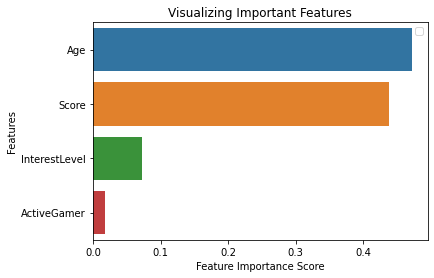

In [26]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()

So basically this tell us that in the case of Iris dataset, the most important features to differentiate between species are Petal Width and Petal Length. We now can use this information to re-calculate the accuracy that can be obtained by keeping only this 2 features:

In [27]:
X.head()

,ActiveGamer,Age,Score,InterestLevel
0,0,19,19,2
1,0,35,20,8
2,1,26,43,5
3,1,27,57,10
4,0,19,76,10


In [32]:
X=X.drop(['SepalLengthCm', 'SepalWidthCm'], axis=1)

In [33]:
X.head()

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [34]:
seed = 0
random.seed(0)
np.random.seed(0)


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=seed)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (120, 2) (120,)
Test set: (30, 2) (30,)


Text(0, 0.5, 'Cross-Validated Accuracy')

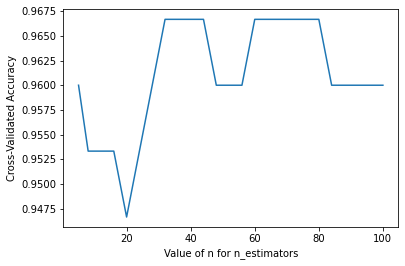

In [35]:
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 100, num = 25)]
n_scores=[]
for n in n_estimators:
    RF = RandomForestClassifier(n_estimators=n,  random_state=seed)
    scores = cross_val_score(RF,X,y)
    n_scores.append(scores.mean())
    
plt.plot(n_estimators,n_scores)
plt.xlabel('Value of n for n_estimators')
plt.ylabel('Cross-Validated Accuracy')

So for a n_estimator=28 we obtain a score of 0,966, therefore we got the same accuracy but using just 2 features instead of 4, which simplifies the model and reduces computing time

## Exercise 2

In [36]:
path =r'C:\python_sqm\data\raw\AI-ML_Nokia\animals'

train = pd.read_csv(path + '/train.csv', delimiter=",")
#test = pd.read_csv(path + '/test.csv', delimiter=",")


In [37]:
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [38]:
import datetime
train["DateTime"] = pd.to_datetime(train["DateTime"]).dt.date
#test["DateTime"] = pd.to_datetime(test["DateTime"]).dt.date

train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [39]:
train.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,874,5,16,2,5,44,1380,366
top,A666592,Max,2014-07-12,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,129,10769,7816,15595,9779,3969,8810,2824


In [40]:
train["OutcomeType"].unique()

array(['Return_to_owner', 'Euthanasia', 'Adoption', 'Transfer', 'Died'],
      dtype=object)

[Text(0, 0, 'Return_to_owner'),
 Text(0, 0, 'Euthanasia'),
 Text(0, 0, 'Adoption'),
 Text(0, 0, 'Transfer'),
 Text(0, 0, 'Transfer')]

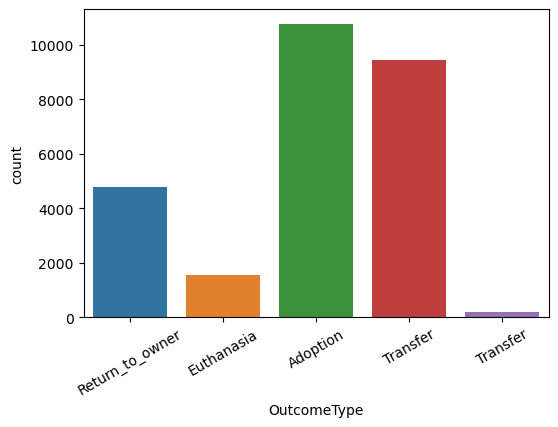

In [50]:
plt.figure(figsize=(6,4))
g=sns.countplot(x="OutcomeType", data=train)
g.set_xticklabels(rotation=30, labels=train['OutcomeType'])


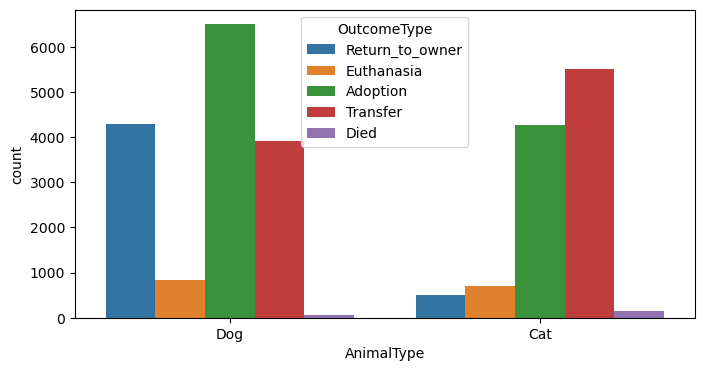

In [51]:
plt.figure(figsize=(8,4))

sns.countplot(x="AnimalType",hue="OutcomeType",data=train)

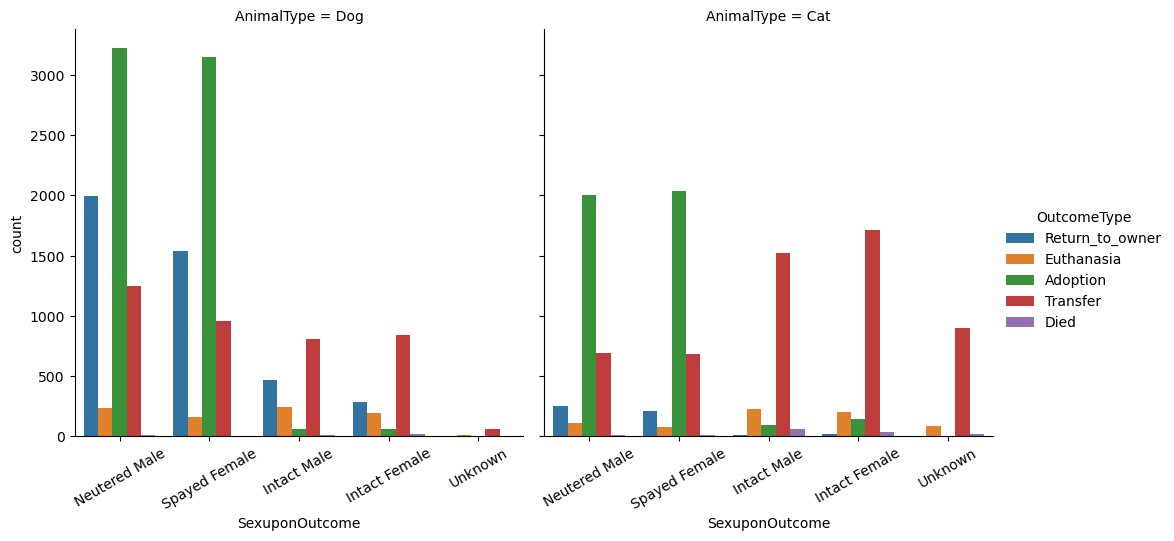

In [53]:
#sns.set_style("ticks")
#sns.set(rc={'figure.figsize':(20,10)})
# the size of A4 paper
#fig.set_size_inches(11.7, 8.27)
g=sns.catplot(x="SexuponOutcome", hue="OutcomeType", col="AnimalType", data=train, kind="count")
g.set_xticklabels(rotation=30)
#sns.despine()

So we see here that for both Anymal Type, Spayed and Neutered animals have the best chances to be adopted, although it seems that for dogs this also indicated a greater probability to be returned to owner.

In [54]:
train[['Age_to_Outcome','Unit']] = train['AgeuponOutcome'].str.split(" ",expand=True)
#test[['Age_to_Outcome','Unit']] = test['AgeuponOutcome'].str.split(" ",expand=True)


In [55]:
train['Unit']=train['Unit'].str.rstrip('s')
#test['Unit']=test['Unit'].str.rstrip('s')

In [56]:
train.groupby(train['Unit']).size().reset_index(name='counts')

,Unit,counts
0,day,398
1,month,9620
2,week,1850
3,year,14843


So now we can calculate the Age upon Outcome for every Animal

In [57]:
train['Age_to_Outcome']=train['Age_to_Outcome'].apply(pd.to_numeric)
#test['Age_to_Outcome']=test['Age_to_Outcome'].apply(pd.to_numeric)


In [58]:
train['Outcone_age()'] = np.where(train['Unit']=="year",train['Age_to_Outcome'],
                                                np.where(train['Unit']=="month",train['Age_to_Outcome']/12,
                                                np.where(train['Unit']=="week",train['Age_to_Outcome']/52,
                                                train['Age_to_Outcome']/365))).astype(float)
train.head(3)

#test['Outcone_age()'] = np.where(test['Unit']=="year",test['Age_to_Outcome'],
#                                                np.where(test['Unit']=="month",test['Age_to_Outcome']/12,
#                                                np.where(test['Unit']=="week",test['Age_to_Outcome']/52,
#                                                test['Age_to_Outcome']/365))).astype(float)


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Age_to_Outcome,Unit,Outcone_age()
0,A671945,Hambone,2014-02-12,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,1.0,year,1.0
1,A656520,Emily,2013-10-13,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1.0,year,1.0
2,A686464,Pearce,2015-01-31,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,2.0,year,2.0


In [59]:
train['Color'].value_counts()

Black/White               2824
Black                     2292
Brown Tabby               1635
Brown Tabby/White          940
White                      931
                          ... 
Black/Black Tabby            1
Brown Tabby/Gray Tabby       1
Orange Tiger                 1
Orange Tabby/Apricot         1
Gray/Red                     1
Name: Color, Length: 366, dtype: int64

In [60]:
plt.style.use('default')


In [62]:
train=train.dropna()
y = train["OutcomeType"]
X = train.drop(["OutcomeType","OutcomeSubtype","AgeuponOutcome","AnimalID","Name", "Unit", "Age_to_Outcome", "DateTime"],axis=1)
X.head()

,AnimalType,SexuponOutcome,Breed,Color,Outcone_age()
1,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,1.000000
2,Dog,Neutered Male,Pit Bull Mix,Blue/White,2.000000
5,Dog,Intact Female,Cairn Terrier/Chihuahua Shorthair,Black/Tan,0.083333
6,Cat,Intact Male,Domestic Shorthair Mix,Blue Tabby,0.057692
12,Dog,Neutered Male,Pit Bull Mix,Brown,4.000000


In [100]:
seed = 0
random.seed(0)
np.random.seed(0)

# Train Test Split
Xtrain, Xtest, ytrain, ytest = train_test_split( X, y, test_size=0.3, random_state=seed)
print ('Train set:', Xtrain.shape,  ytrain.shape)
print ('Test set:', Xtest.shape,  ytest.shape)

Train set: (4885, 5) (4885,)
Test set: (2094, 5) (2094,)


In [101]:
#ytrain.head()
Xtrain.dtypes

AnimalType         object
SexuponOutcome     object
Breed              object
Color              object
Outcone_age()     float64
dtype: object

In [102]:
count = Xtrain.isna().sum()
count

AnimalType        0
SexuponOutcome    0
Breed             0
Color             0
Outcone_age()     0
dtype: int64

Now we have to convert text categorical variables to a numeric format in order to be accepted by the different ML algorithms

In [103]:
from sklearn import preprocessing
le_anima = preprocessing.LabelEncoder()
Xtrain.AnimalType = le_anima.fit_transform(Xtrain.AnimalType)
le_sex = preprocessing.LabelEncoder()
Xtrain.SexuponOutcome = le_sex.fit_transform(Xtrain.SexuponOutcome)
le_breed = preprocessing.LabelEncoder()
Xtrain.Breed = le_breed.fit_transform(Xtrain.Breed)
le_color = preprocessing.LabelEncoder()
Xtrain.Color = le_color.fit_transform(Xtrain.Color)
le_out = preprocessing.LabelEncoder()
ytrain = le_out.fit_transform(ytrain)
#Let's see
Xtrain.head()

C:\Users\salcedo1\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,AnimalType,SexuponOutcome,Breed,Color,Outcone_age()
25706,1,0,416,64,3.000000
15126,1,2,273,141,1.000000
10402,0,2,257,53,1.000000
12907,1,1,280,142,0.666667
8051,0,0,257,2,0.083333


In [104]:
ytrain

array([2, 0, 3, ..., 2, 0, 3])

In [105]:
Xtest.AnimalType = le_anima.fit_transform(Xtest.AnimalType)
Xtest.SexuponOutcome = le_sex.fit_transform(Xtest.SexuponOutcome)
Xtest.Breed = le_breed.fit_transform(Xtest.Breed)
Xtest.Color = le_color.fit_transform(Xtest.Color)
ytest = le_out.fit_transform(ytest)
#Let's see
Xtest.head()

C:\Users\salcedo1\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,AnimalType,SexuponOutcome,Breed,Color,Outcone_age()
18141,1,3,23,134,2.000000
26010,0,1,139,88,0.166667
8443,0,3,139,38,0.250000
8094,0,1,137,38,1.000000
4679,0,2,139,137,0.250000


## SVM

In [86]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, KFold


svm_parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

cv_method = KFold(n_splits=2, shuffle=True, random_state=seed)

gs_svm = GridSearchCV(svm.SVC(), 
                      param_grid=svm_parameters, 
                      cv=cv_method,
                      verbose=0,  # verbose: the higher, the more messages
                      n_jobs=-1)

svm_out=gs_svm.fit(Xtrain, ytrain)

In [87]:
cf = svm_out.best_estimator_
cf.fit(Xtrain, ytrain)
y_pred_train = cf.predict(Xtrain)
y_pred_test = cf.predict(Xtest)
#Print the results of the fitting and hyperparameter optimization process
print('Decision Tree Results:')
print('Train Score: ', (metrics.accuracy_score(ytrain, y_pred_train)).round(2))
print('Test Score: ', (metrics.accuracy_score(ytest, y_pred_test)).round(2))
print('\n')
#If you want to explore what the best parameters are for the given model with the given data,
#run the below command
gs_svm.best_params_

Decision Tree Results:
Train Score:  0.65
Test Score:  0.66




{'kernel': 'linear'}

So the accuracy for SVM under the actual features was not so good. Let's try with Decision Trees:

## Decision Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [107]:
dT_parameters = {'max_depth' : [1,2,3,4,5,6,7,8,9]}

cv_method = KFold(n_splits=2, shuffle=True, random_state=seed)

gs_dT = GridSearchCV(DecisionTreeClassifier(), 
                      param_grid=dT_parameters, 
                      cv=cv_method,
                      verbose=0,  # verbose: the higher, the more messages
                      n_jobs=-1)

dT_out=gs_dT.fit(Xtrain, ytrain)

In [108]:
cf = dT_out.best_estimator_
cf.fit(Xtrain, ytrain)
y_pred_train = cf.predict(Xtrain)
y_pred_test = cf.predict(Xtest)
#Print the results of the fitting and hyperparameter optimization process
print('Decision Tree Results:')
print('Train Score: ', (metrics.accuracy_score(ytrain, y_pred_train)).round(2))
print('Test Score: ', (metrics.accuracy_score(ytest, y_pred_test)).round(2))
print('\n')
#If you want to explore what the best parameters are for the given model with the given data,
#run the below command
gs_dT.best_params_

Decision Tree Results:
Train Score:  0.75
Test Score:  0.74




{'max_depth': 4}

A little better!

In [109]:
from sklearn.ensemble import RandomForestClassifier


In [112]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

RF_parameters = {'criterion': ['gini', 'entropy'],
                'n_estimators':n_estimators,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

cv_method = KFold(n_splits=2, shuffle=True, random_state=seed)

gs_RF = GridSearchCV(RandomForestClassifier(), 
                      param_grid=RF_parameters, 
                      cv=cv_method,
                      verbose=0,  # verbose: the higher, the more messages
                      n_jobs=-1)

RF_out=gs_RF.fit(Xtrain, ytrain)

In [113]:
cf = RF_out.best_estimator_
cf.fit(Xtrain, ytrain)
y_pred_train = cf.predict(Xtrain)
y_pred_test = cf.predict(Xtest)
#Print the results of the fitting and hyperparameter optimization process
print('Decision Tree Results:')
print('Train Score: ', (metrics.accuracy_score(ytrain, y_pred_train)).round(2))
print('Test Score: ', (metrics.accuracy_score(ytest, y_pred_test)).round(2))
print('\n')
#If you want to explore what the best parameters are for the given model with the given data,
#run the below command
gs_RF.best_params_

Decision Tree Results:
Train Score:  0.78
Test Score:  0.73




{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 90,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 300}

So up to here we got an accuracy of 74% by using Decision Tree algorithm. This number can be improved by feature optimizing